
<center>
<img src="https://drive.google.com/uc?id=1GkjZ9W02VQp4w4a4wA70NwRxDcwJJjWd" width="250" height="250" allow="autoplay"></img>


# <center> Automatic Multimodal Brain Tumor Segmentation using Deep Convolutional Neural Networks <center/>
$ 
\fbox{
$ \scriptsize
Sunaina\  Saxena \\
\scriptsize
Department\ of\ Electrical\ Engineering\\
\scriptsize
IIT\ Bombay \\
\scriptsize
213070001@iitb.ac.in
$
} \ \ \ \ \ 
\fbox{   
$\scriptsize
Nihar\ Mahesh\  Gupte \\
\scriptsize
Department\ of\ Electrical\ Engineering\\
\scriptsize
IIT\ Bombay \\
\scriptsize
213070002@iitb.ac.in
$
} \ \ \ \ \ 
\fbox{   
$\scriptsize
Harsh\  Diwakar \\
\scriptsize
Department\ of\ Electrical\ Engineering\\
\scriptsize
IIT\ Bombay \\
\scriptsize
213070018@iitb.ac.in
$
} \ \ \ \ \ 
\fbox{   
$\scriptsize
Mohit\ Kumar\ Meena \\
\scriptsize
Department\ of\ Electrical\ Engineering\\
\scriptsize
IIT\ Bombay \\
\scriptsize
213070021@iitb.ac.in
$
} 
$
<center/>


In this notebook, we will segment Glioma Brain Tumors using fully automated deep learning methods, namely 2D U-Net and 3D U-Net.

## Outline
- [1. Introduction](#1)
- [2. Dataset](#2)
  - [2.1 BraTS 2018 Dataset](#2.1)
  - [2.2 Vizualization of Dataset](#2.2)
  - [2.3 Data Preprocessing](#2.3)
    * [2.3.1 Save data in file](#2.3.1) 
    * [2.3.2 For 2D U-Net](#2.3.2)
    * [2.3.3 For 3D U-Net](#2.3.3)
- [3. Segmentation using 2D U-Net](#3)
  - [3.1 U-Net Model](#3.1)
  - [3.2 Visualize the Architecture](#3.2)
  - [3.3 Dice Loss and Dice Coefficient](#3.3)
  - [3.4 Train Validation Test Split](#3.4)
  - [3.5 Compile the model](#3.5)
  - [3.6 Train and Save the model](#3.6)
-[4. Segmentation using 3D U-Net](#4)
  - [4.1 3D U-Net Model](#4.1)
  - [4.2 Dice Loss and Dice Coefficient for 3D U-net](#4.2)
  - [4.3 Compile and Train the model](#4.3)
- [5. Results](#5)
  - [5.1 Results of 2D U-Net Model](#5.1)
  - [5.2 Results of 3D U-Net Model](#5.2)



##Packages
Following Packages will be used in this notebook-
- cv2
- glob
- h5py
- imageio
- IPython
- Keras
- Matplotlib 
- Nibabel
- Numpy
- os
- Pandas
- Pillow
- regex
- skimage
- sklearn
- TensorFlow
- tqdm

## Import Packages and Mount Google Drive



In [ ]:
import tensorflow as tf
from tensorflow import keras
import nibabel as nib
import sklearn
from glob import glob
from tqdm import tqdm
import regex as re
import pandas as pd
import matplotlib.pyplot as plt
import h5py
from PIL import Image
import os
import numpy as np
from keras import layers, Sequential
!pip install SimpleITK
import SimpleITK as sitk
import cv2
import imageio
from IPython.display import Image
from keras.models import Model
from tensorflow.keras.optimizers import Adam,RMSprop
import keras.callbacks as callbacks
import keras.initializers as initializers
from keras.callbacks import Callback
from keras import regularizers
from tensorflow.keras import backend as K 
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import (
    MaxPooling2D,
    Conv2D,
    Dense,
    BatchNormalization,
    concatenate,
    Input,
    Dropout,
    Maximum,
    Activation,
    Flatten,
    UpSampling2D,
    Conv2DTranspose,
    Activation,
    Conv3D,
    Conv3DTranspose,
    MaxPooling3D,
    UpSampling3D,
    concatenate
)
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<a name="1"></a>
# 1 Introduction
<img src="https://drive.google.com/uc?id=1HVnAy1bxkiU-clpxQMLwCivenE7bfgYe" allow="autoplay"></img> 
<img src="https://drive.google.com/uc?id=1HXi0-FPP8TMEyQ6fWU15FIXCshvWeii0" width="202" height="202" allow="autoplay"></img> 

[$ \scriptsize \textsf{Image Source-1}$](https://braintumors.ufhealth.org/learn/patient-education/)          [$ \scriptsize  \ \ \ \textsf{Image Source-2}$](https://www.labiotech.eu/trends-news/clinspec-diagnostics-brain-cancer-ai/)

##Glioma Brain Tumors
- Glioma Brain Tumors are the main cause of tumors in the brain that is caused by mass growth of abnormal glial cells that surround nerve cells and help them function.
- It can affect brain function and even can be life-threatening with a survival rate of less than 25%.
- They can be catagorized into two catagories,
  1. Low Grade Glioma (LGG)- Slow growing, Grade I,II.
  2. High Grade Glioma (HGG)- Fast growing, Grade III,IV.

## Approach
For segmentation of Glioma Brain Tumors, we followed bellow given steps,
1. Data Preprocessing, where we converted BraTS dataset in different formats for handling the data properly.
2. Model Deployment, where we deployed two models namely 2D U-Net and 3D U-Net.
3. Model Testing, where we tested the models on a test dataset
4. Finally, we have visualized the results from both the models



<a name="2"></a>
# 2 Dataset
In this section, we will explain the dataset used for this project and also preprocess the data to be used in both models.



<a name="2.1"></a>
## 2.1 BraTS Dataset
- [Brain Tumor Segmentation (BraTS) challenge Dataset, 2018 (MICCAI)](https://www.med.upenn.edu/sbia/brats2018/data.html) consists synthetic and real images divided into HGG and LGG categories. The number of samples of patients with HGG is 210 and for patients with LGG is 75.
- For each patient, FLAIR, T1, T2, and T1 (Contrast Enhanced) modalities MRI sequences are available in the NifTI format (.nii.gz). Where,
    - FLAIR: 'Fluid Attenuated Inversion Recovery 
    - T1: native
    - T2: Tw-weighted
    - T1 (CE): Post-contrast T1-weighted
  acquired with different clinical protocols and various scanners from multiple institutions.
- So, the shape of MRI samples of patients becomes: (N, 155, 240, 240, 4). Where N is the number of patients with 155 slides of dimension 240x240.
- The segmented label of each patient contains four values:
  - 0: Background 
  - 1: Edema
  - 2: Non-Enhancing tumor
  - 4: Enhancing tumor: These 4 will be converted to 3 later for better implementation
- Now, the shape of segment is (N,155,240,240).

<a name="2.2"></a>
##2.2 Vizualization of Dataset

In this section, we will load an MRI file and its segment from a/the file using the Nibabel library then make a combined labeled image and display it in sagittal, coronal, and transversal planes. After Visualization, different slices are also converted into a gif file for better visualization.

### Plot Sagittal, Coronal and Transversal plane at different locations 

Steps involved in this are:

1. Load one modality and segment label from the file using the Nibabel library
2. Convert label in categorical data with 4 different channels
3. Normalize the image and use the first channel to blackout the portion where there are tumors
4. Add three types of tumors in different colors (red-enhancing tumor, blue-non-enhancing tumor, and green-edema)
5. Plot the sagittal, coronal, and transverse view using NumPy rotate and matplotlib

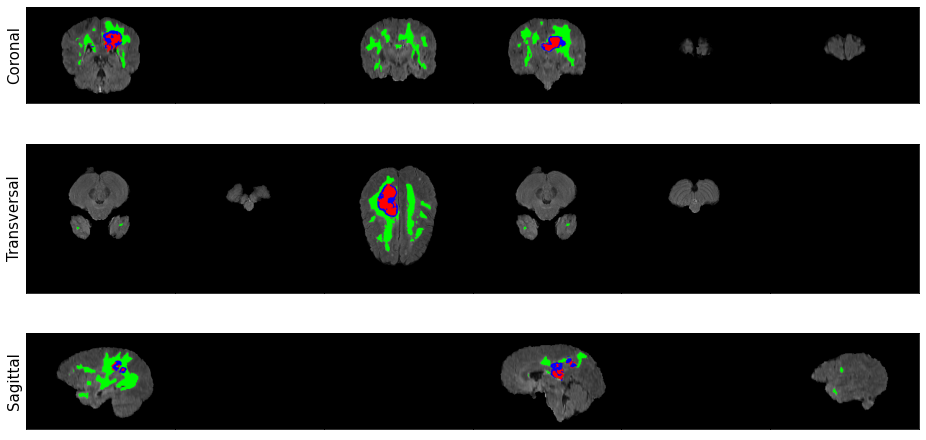

In [ ]:
path_file = '/content/drive/Shareddrives/CS725_Project/data/BRATS2013/HGG/Brats18_CBICA_AWH_1/'
file_name = 'Brats18_CBICA_AWH_1_'
path_label = path_file+file_name+'seg.nii.gz'
path_image_1 = path_file+file_name+'flair.nii.gz'

image = np.array(nib.load(path_image_1).get_fdata())
label = np.array(nib.load(path_label).get_fdata())
label = np.where(label==4,3,label)
is_categorical=False
if not is_categorical:
    label_cat = to_categorical(label, num_classes=4).astype(np.uint8)
image_norm = cv2.normalize(image[:, :, :], None, alpha=0, beta=255,
                      norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F).astype(np.uint8)

labeled_image = np.zeros_like(label_cat[:, :, :, 1:])

# remove tumor part from image
labeled_image[:, :, :, 0] = image_norm * (label_cat[:, :, :, 0])
labeled_image[:, :, :, 1] = image_norm * (label_cat[:, :, :, 0])
labeled_image[:, :, :, 2] = image_norm * (label_cat[:, :, :, 0])

# color labels
labeled_image += label_cat[:, :, :, 1:] * 255

data_all = []
data_all.append(labeled_image)
# coronal plane
coronal = np.transpose(data_all, [1, 3, 2, 4, 0])
coronal = np.rot90(coronal, 1)
# transversal plane
transversal = np.transpose(data_all, [2, 1, 3, 4, 0])
transversal = np.rot90(transversal, 2)
# sagittal plane
sagittal = np.transpose(data_all, [2, 3, 1, 4, 0])
sagittal = np.rot90(sagittal, 1)

fig, ax = plt.subplots(3, 6, figsize=[16, 9])

for i in range(6):
    n = np.random.randint(coronal.shape[2])
    ax[0][i].imshow(np.squeeze(coronal[:, :, n, :]))
    ax[0][i].set_xticks([])
    ax[0][i].set_yticks([])
    if i == 0:
        ax[0][i].set_ylabel('Coronal', fontsize=15)

for i in range(6):
    n = np.random.randint(transversal.shape[2])
    ax[1][i].imshow(np.squeeze(transversal[:, :, n, :]))
    ax[1][i].set_xticks([])
    ax[1][i].set_yticks([])
    if i == 0:
        ax[1][i].set_ylabel('Transversal', fontsize=15)

for i in range(6):
    n = np.random.randint(sagittal.shape[2])
    ax[2][i].imshow(np.squeeze(sagittal[:, :, n, :]))
    ax[2][i].set_xticks([])
    ax[2][i].set_yticks([])
    if i == 0:
        ax[2][i].set_ylabel('Sagittal', fontsize=15)

fig.subplots_adjust(wspace=0, hspace=0)

### Convert the above plots in gif
Here, the plots obtained in the above step are converted into a gif file with the same labels as above using the imageio library. Three views from left to right are- Sagitta, Transversal, and Coronal.

In [ ]:
def visualize_data_gif(data_, pathh):
    images = []
    for i in range(data_.shape[0]):
        x = data_[min(i, data_.shape[0] - 1), :, :]
        y = data_[:, min(i, data_.shape[1] - 1), :]
        z = data_[:, :, min(i, data_.shape[2] - 1)]
        img = np.concatenate((x, y, z), axis=1)
        images.append(img)
    imageio.mimsave(pathh, images, duration=0.0025)
    return Image(filename=pathh, format='png')

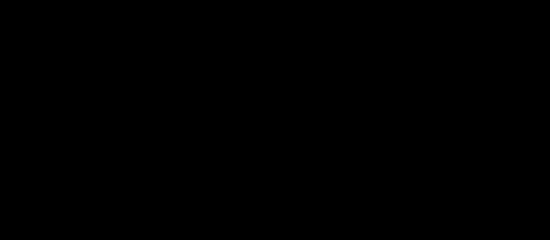

In [ ]:
visualize_data_gif(labeled_image,'/content/drive/Shareddrives/CS725_Project/Presentation/Mohit_prediction.gif')

###Save the gif file

In [ ]:
pathh = '/content/drive/Shareddrives/CS725_Project/Presentation/gif.gif'
Image(filename=pathh, format='png')

<a name="2.3"></a>
##2.3 Data Preprocessing

In this section, we have preprocessed the data from nii.gz format to NumPy and h5 file format to use this data to train the model easily.

Firstly, we will save all the data in google shared drive in NumPy array in batches of 70 samples because of RAM constraints. Then, we use this data to load and preprocess for 2D U-Net and 3D U-Net.

A block representation of data preprocessing for 2D and 3D U-Net is shown in the figure below:
<img src="https://drive.google.com/uc?id=1-67AokhByfeM6_NPpYUxb79wJ4b6MpbO" allow="autoplay"></img>


<a name="2.3.1"></a>
### 2.3.1 Save data in file

In [ ]:
Dataset_folder_path = r"/content/drive/Shareddrives/CS725_Project/data/BRATS2013"

In [ ]:
def load_data(path,batch):
  my_dir = sorted(os.listdir(path))
  data = []
  gt = []
  for p in tqdm(my_dir[70*batch:70*(batch + 1)]):
    data_list = sorted(os.listdir(path+p))
    img_itk = sitk.ReadImage(path + p + '/'+ data_list[0])
    flair = sitk.GetArrayFromImage(img_itk)
    img_itk = sitk.ReadImage(path + p + '/'+ data_list[1])
    seg =  sitk.GetArrayFromImage(img_itk)
    img_itk = sitk.ReadImage(path + p + '/'+ data_list[2])    
    t1 =  sitk.GetArrayFromImage(img_itk)
    img_itk = sitk.ReadImage(path + p + '/'+ data_list[3])
    t1ce =  sitk.GetArrayFromImage(img_itk)
    img_itk = sitk.ReadImage(path + p + '/'+ data_list[4])
    t2 =  sitk.GetArrayFromImage(img_itk)
    data.append([flair,t1,t1ce,t2])
    gt.append(seg)
  data = np.asarray(data,dtype=np.float32)
  gt = np.asarray(gt,dtype=np.uint8)
  return data,gt

In [ ]:
Batch_path = r"/content/drive/Shareddrives/CS725_Project/data/BRATS2013/"

data_hgg_0,gt_hgg_0 = load_data(Dataset_folder_path + "/HGG/",batch = 0) 
data_hgg_0_modified = np.transpose(data_hgg_0,axes = (0,2,3,4,1))
np.save(Batch_path + "Batch_0.npy" , data_hgg_0_modified)
np.save(Batch_path + "Batch_0_gt.npy", gt_hgg_0)

del data_hgg_0, gt_hgg_0, data_hgg_0_modified 

data_hgg_1,gt_hgg_1 = load_data(Dataset_folder_path + "/HGG/",batch = 1) 
data_hgg_1_modified = np.transpose(data_hgg_1,axes = (0,2,3,4,1))
np.save(Batch_path + "Batch_1.npy" , data_hgg_1_modified)
np.save(Batch_path + "Batch_1_gt.npy", gt_hgg_1)

del data_hgg_1, gt_hgg_1, data_hgg_1_modified

data_hgg_2,gt_hgg_2 = load_data(Dataset_folder_path + "/HGG/",batch = 2) 
data_hgg_2_modified = np.transpose(data_hgg_2,axes = (0,2,3,4,1))
np.save(Batch_path + "Batch_2.npy" , data_hgg_2_modified)
np.save(Batch_path + "Batch_2_gt.npy", gt_hgg_2)

del data_hgg_2, gt_hgg_2, data_hgg_2_modified

<a name="2.3.2"></a>
###2.3.2 Data Preprocessing for 2d U-Net
Now, from the visualization of data we know that there are some redundant slices available in both MRI and segments in all three (sagittal, coronal, and transversal) views present at the starting and ending. So, the steps followed for 2D U-Net data preprocessing are-

1. Load a batch from the file
2. Crop out the redundant data from the array
3. Open up all the slices to get samples of 192x192x3 image


In [ ]:
def get_batch(base_path, batchname):

  Batch_path = base_path + "/" + "Batch_" + str(batchname) + ".npy"
  Batch_gt_path = base_path + "/" + "Batch_" + str(batchname) + "_gt.npy"

  Dataset_batch0 = np.load(Batch_path)
  Dataset_label0 = np.load(Batch_gt_path)

  Dataset_batch0_new = Dataset_batch0[:,30:125,30:222,30:222,:].reshape((-1,192,192,4))
  Dataset_label0_new = Dataset_label0[:,30:125,30:222,30:222].reshape((-1,192,192))

  del Dataset_batch0, Dataset_label0

  return Dataset_batch0_new, Dataset_label0_new

In [ ]:
PATH = r"/content/drive/Shareddrives/CS725_Project/data/BRATS2013"

X, Y = get_batch(base_path = PATH, batchname = 0)

print(X.shape,Y.shape)

<a name="2.3.3"></a>
###2.3.3 Data Preprocessing for 3d U-Net

Unlike 2D U-Net architecture we can not use the whole 3D volume for training due to limited RAM constraints. For that reason, we will extract sub-volumes from one 3D volume. Then that will be saved in h5 file format to train, validate and test the model in the future.

#### Extract Sub Volume

Extraction of sub-volumes is not an easy task because if the sub-volume will not contain any label then it is of no use. So, the following algorithm is used to make sure that at least 5% of the sub-volume is a label and not background.

1. while (tries< max_tries):
  - 1.1. select a random sample from the segmented label
  - 1.2. if (background< 95% of total sampled sub-volume):  
    * go to step-2
  - 1.3 check if the current sampled volume contains less background from the saved sub-volume:
    * change the saved sub-volume to current 
2. from the subsamples selected from steps 1.2 or 1.3 extract the same sub-volume from MRI data
3. return the MRI data and labels

Here, step 1.3 will ensure that even if we fail to find a sample with at least 5% labels, we will get the sample with a maximum percentage of labels without background.

In [ ]:
def get_sub_volume(image, label, 
                   orig_x = 240, orig_y = 240, orig_z = 155, 
                   output_x = 160, output_y = 160, output_z = 16,
                   num_classes = 4, max_tries = 100, 
                   background_threshold=0.96):
  
    # Initialize features and labels with `None`
    X = None
    y = None

    tries = 0    
    minn = 1
    while tries < max_tries:
        # randomly sample sub-volume by sampling the corner voxel
        mid_x = int(orig_x/2)
        mid_y = int(orig_y/2)
        mid_z = int(orig_z/2)
        dev_x = int((orig_x - output_x)/2)
        dev_y = int((orig_y - output_y)/2)
        dev_z = int((orig_z - output_z)/2)
        
        x_pt = np.random.randint(mid_x-dev_x, mid_x+dev_x)
        y_pt = np.random.randint(mid_y-dev_y, mid_y+dev_y)
        z_pt = np.random.randint(mid_z-dev_z, mid_z+dev_z)
        
        start_x = int(x_pt-output_x/2)
        start_y = int(y_pt-output_y/2)
        start_z = int(z_pt-output_z/2)
        
        # extract relevant area of label
        y = label[start_x: start_x + output_x,
                  start_y: start_y + output_y,
                  start_z: start_z + output_z]
        # One-hot encode the categories.
        y = keras.utils.to_categorical(y, num_classes=num_classes)
        # compute the background ratio
        bgrd_ratio = np.sum(y[:, :, :, 0])/(output_x * output_y * output_z)
        if bgrd_ratio< minn:
          minn = bgrd_ratio
          x_min = start_x 
          y_min = start_y 
          z_min = start_z 
          if bgrd_ratio < background_threshold:
            break
        # increment tries counter
        tries += 1

    start_x = x_min 
    start_y= y_min   
    start_z = z_min 
    y = label[start_x: start_x + output_x,
              start_y: start_y + output_y,
              start_z: start_z + output_z,
              ]
    y = keras.utils.to_categorical(y, num_classes=num_classes)
    X = np.copy(image[
                      start_x: start_x + output_x,
                      start_y: start_y + output_y,
                      start_z: start_z + output_z, :])    
    return X, y


#### Save h5 file
Save the above data in h5 for training, validation and testing purposes

##### Train

In [ ]:

save_loc = '/content/drive/Shareddrives/CS725_Project/Harsh /TF_Dataset/Train'
os.chdir(save_loc)
for batch in range(2):
  X = np.load('/content/drive/Shareddrives/CS725_Project/data/BRATS2013/Batch_'+str(batch)+'.npy')
  y = np.load('/content/drive/Shareddrives/CS725_Project/data/BRATS2013/Batch_'+str(batch)+'_gt.npy')
  for i in range(70):
    X_sam = X[i,:,:,:,:]
    y_sam = y[i,:,:,:]
    
    X_sam= np.transpose(X_sam, axes = (1,2,0,3))
    y_sam= np.transpose(y_sam, axes = (1,2,0))
    y_sam = np.where(y_sam==4, 3, y_sam)
    X_sam,y_sam = get_sub_volume(X_sam, y_sam)
    X_sam = X_sam.reshape(1,*X_sam.shape)
    y_sam = y_sam.reshape(1,*y_sam.shape)
  
    f1 = h5py.File('batch_'+ str(batch*70+i)+'.hdf5','w')
    dset1 = f1.create_dataset("X", X_sam.shape, data= X_sam)
    dset2 = f1.create_dataset("y", y_sam.shape, data= y_sam)
    f1.close()


#####Validation

In [ ]:
X = np.load('/content/drive/Shareddrives/CS725_Project/data/BRATS2013/Batch_'+str(2)+'.npy')
y = np.load('/content/drive/Shareddrives/CS725_Project/data/BRATS2013/Batch_'+str(2)+'_gt.npy')
save_loc = '/content/drive/Shareddrives/CS725_Project/Harsh /TF_Dataset/Valid'
os.chdir(save_loc)
# Validation:
for i in range(40):
  X_sam = X[i,:,:,:,:]
  y_sam = y[i,:,:,:]
  
  X_sam= np.transpose(X_sam, axes = (1,2,0,3))
  y_sam= np.transpose(y_sam, axes = (1,2,0))
  y_sam = np.where(y_sam==4, 3, y_sam)
  X_sam,y_sam = get_sub_volume(X_sam, y_sam)
  X_sam = X_sam.reshape(1,*X_sam.shape)
  y_sam = y_sam.reshape(1,*y_sam.shape)

  f1 = h5py.File('batch_'+ str(batch*70+i)+'.hdf5','w')
  dset1 = f1.create_dataset("X", X_sam.shape, data= X_sam)
  dset2 = f1.create_dataset("y", y_sam.shape, data= y_sam)
  f1.close()

##### Test

In [ ]:
# Test:
save_loc = '/content/drive/Shareddrives/CS725_Project/Harsh /TF_Dataset/Test'
os.chdir(save_loc)
for i in range(40,70):
  X_sam = X[i,:,:,:,:]
  y_sam = y[i,:,:,:]
  
  X_sam= np.transpose(X_sam, axes = (1,2,0,3))
  y_sam= np.transpose(y_sam, axes = (1,2,0))
  y_sam = np.where(y_sam==4, 3, y_sam)
  X_sam,y_sam = get_sub_volume(X_sam, y_sam)
  X_sam = X_sam.reshape(1,*X_sam.shape)
  y_sam = y_sam.reshape(1,*y_sam.shape)

  f1 = h5py.File('batch_'+ str(batch*70+i)+'.hdf5','w')
  dset1 = f1.create_dataset("X", X_sam.shape, data= X_sam)
  dset2 = f1.create_dataset("y", y_sam.shape, data= y_sam)
  f1.close()

<a name="3"></a>
# 3 Segmentation using 2D U-Net
[U-Net](https://link.springer.com/chapter/10.1007/978-3-319-24574-4_28) was originally invented and first used for biomedical image segmentation because of the specialty of performing image localization by predicting image pixel by pixel.

A standard U-Net is shown in the image below:


<img src="https://drive.google.com/uc?id=1-5uG1alERaIZffToTkwy6VljsYSYmYrO" allow="autoplay"></img> 


[$ \scriptsize  \ \ \ \textsf{Image Source}$](https://link.springer.com/chapter/10.1007/978-3-319-24574-4_28)

Here different operations include-

1. Convolution Layer followed by ReLU Activation
2. MaxPool Layer
3. UpConv Layer
4. Skip Connections




<a name="3.1"></a>
## 3.1 U-Net Model

Here, a similar architecture is used as explained above using TensorFlow and Keras.

In [ ]:

############ Encoder #############
input_ = Input(shape=(192,192,4),name='input')                                              

block1_conv1 = Conv2D(64,3,padding='same',activation='relu',name='block1_conv1')(input_)
block1_conv2 = Conv2D(64,3,padding='same',activation='relu',name='block1_conv2')(block1_conv1)
block1_norm = BatchNormalization(name='block1_batch_norm')(block1_conv2)
block1_pool = MaxPooling2D(name='block1_pool')(block1_norm)

block2_conv1 = Conv2D(128,3,padding='same',activation='relu',name='block2_conv1')(block1_pool)
block2_conv2 = Conv2D(128,3,padding='same',activation='relu',name='block2_conv2')(block2_conv1)
block2_norm = BatchNormalization(name='block2_batch_norm')(block2_conv2)
block2_pool = MaxPooling2D(name='block2_pool')(block2_norm)

encoder_dropout_1 = Dropout(0.2,name='encoder_dropout_1')(block2_pool)

block3_conv1 = Conv2D(256,3,padding='same',activation='relu',name='block3_conv1')(encoder_dropout_1)
block3_conv2 = Conv2D(256,3,padding='same',activation='relu',name='block3_conv2')(block3_conv1)
block3_norm = BatchNormalization(name='block3_batch_norm')(block3_conv2)
block3_pool = MaxPooling2D(name='block3_pool')(block3_norm)

block4_conv1 = Conv2D(512,3,padding='same',activation='relu',name='block4_conv1')(block3_pool)
block4_conv2 = Conv2D(512,3,padding='same',activation='relu',name='block4_conv2')(block4_conv1)
block4_norm = BatchNormalization(name='block4_batch_norm')(block4_conv2)
block4_pool = MaxPooling2D(name='block4_pool')(block4_norm)
################### Encoder end ######################

block5_conv1 = Conv2D(1024,3,padding='same',activation='relu',name='block5_conv1')(block4_pool)
# encoder_dropout_2 = Dropout(0.2,name='encoder_dropout_2')(block5_conv1)

########### Decoder ################

up_pool1 = Conv2DTranspose(1024,3,strides = (2, 2),padding='same',activation='relu',name='up_pool1')(block5_conv1)
merged_block1 = concatenate([block4_norm,up_pool1],name='merged_block1')
decod_block1_conv1 = Conv2D(512,3, padding = 'same', activation='relu',name='decod_block1_conv1')(merged_block1)

up_pool2 = Conv2DTranspose(512,3,strides = (2, 2),padding='same',activation='relu',name='up_pool2')(decod_block1_conv1)
merged_block2 = concatenate([block3_norm,up_pool2],name='merged_block2')
decod_block2_conv1 = Conv2D(256,3,padding = 'same',activation='relu',name='decod_block2_conv1')(merged_block2)

decoder_dropout_1 = Dropout(0.2,name='decoder_dropout_1')(decod_block2_conv1)

up_pool3 = Conv2DTranspose(256,3,strides = (2, 2),padding='same',activation='relu',name='up_pool3')(decoder_dropout_1)
merged_block3 = concatenate([block2_norm,up_pool3],name='merged_block3')
decod_block3_conv1 = Conv2D(128,3,padding = 'same',activation='relu',name='decod_block3_conv1')(merged_block3)

up_pool4 = Conv2DTranspose(128,3,strides = (2, 2),padding='same',activation='relu',name='up_pool4')(decod_block3_conv1)
merged_block4 = concatenate([block1_norm,up_pool4],name='merged_block4')
decod_block4_conv1 = Conv2D(64,3,padding = 'same',activation='relu',name='decod_block4_conv1')(merged_block4)
############ Decoder End ######################################

# decoder_dropout_2 = Dropout(0.2,name='decoder_dropout_2')(decod_block4_conv1)

pre_output = Conv2D(64,1,padding = 'same',activation='relu',name='pre_output')(decod_block4_conv1)

output = Conv2D(4,1,padding='same',activation='softmax',name='output')(pre_output)

model2D = Model(inputs = input_, outputs = output)
model2D.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 192, 192, 4  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 192, 192, 64  2368        ['input[0][0]']                  
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 192, 192, 64  36928       ['block1_conv1[0][0]']           
                                )                                                             

<a name="3.2"></a>
## 3.2 Visualize the Architecture

Above created architecture is plotted below using plot_model from Keras.

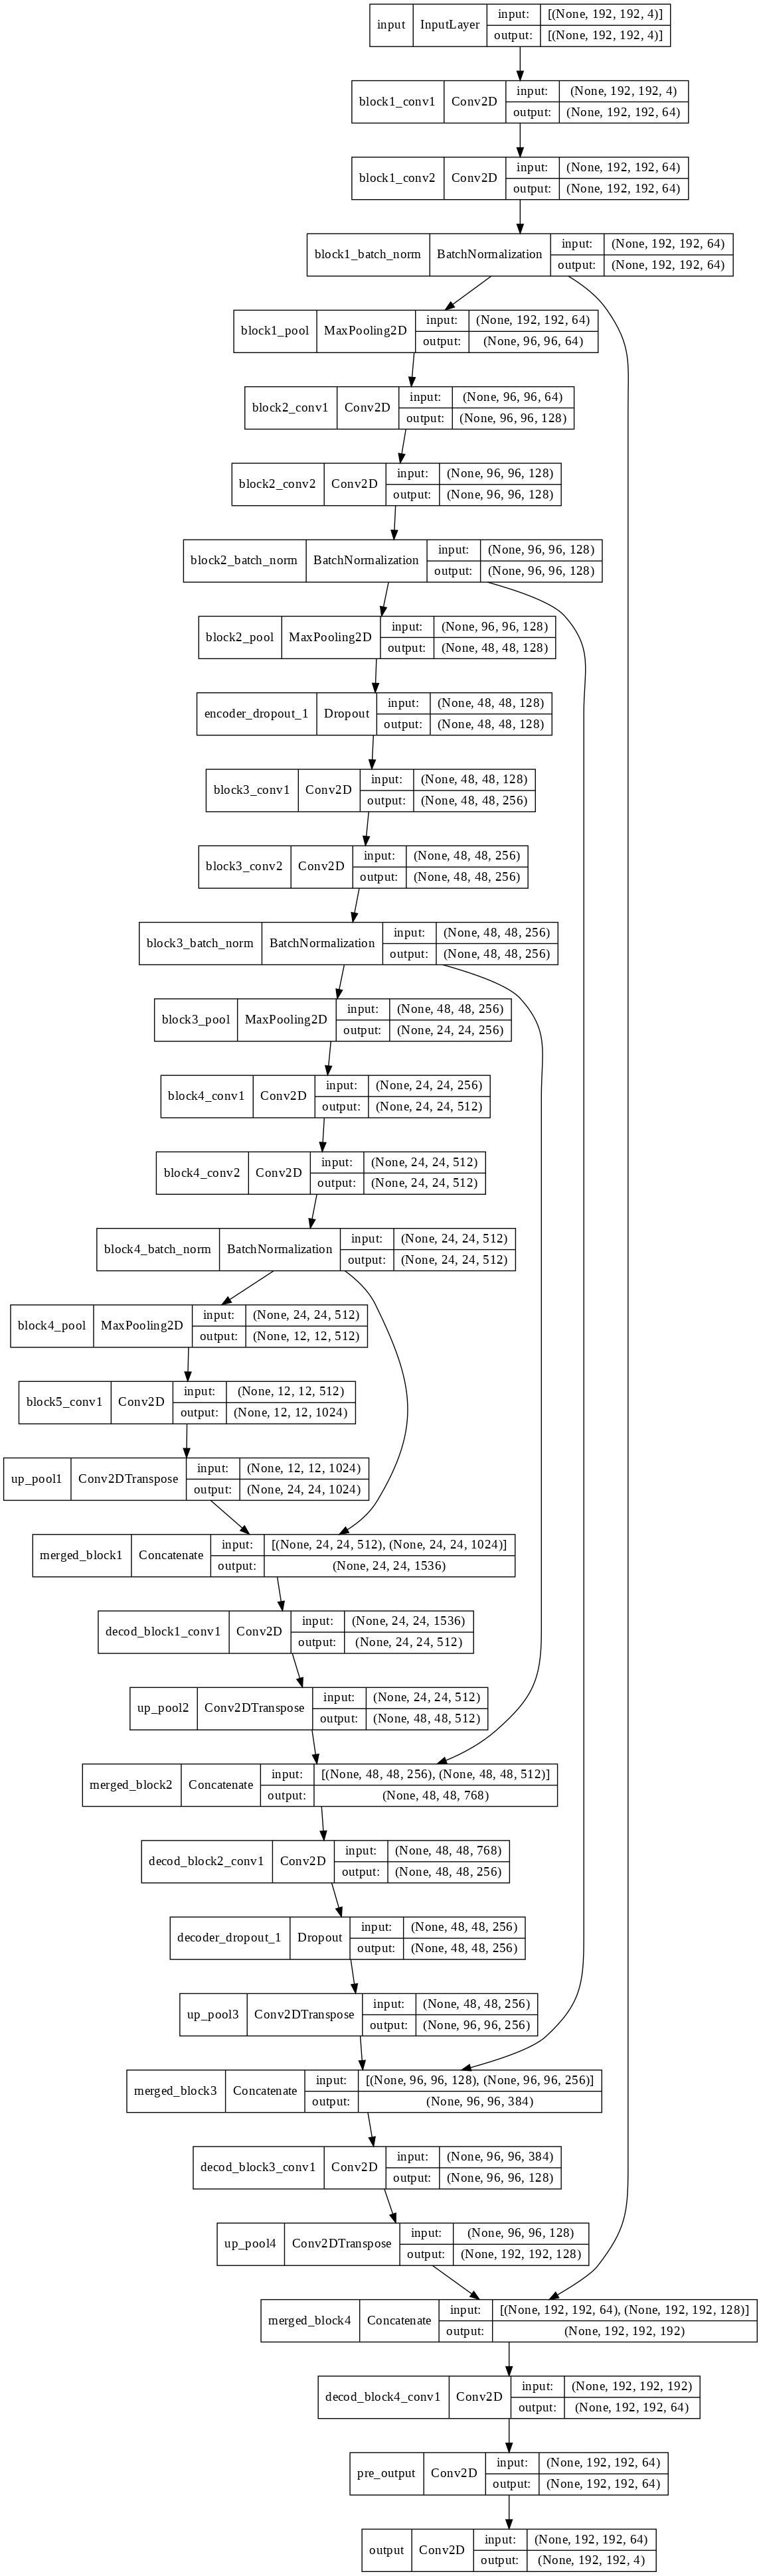

In [ ]:
tf.keras.utils.plot_model(model2D,to_file='/content/drive/Shareddrives/CS725_Project/2D_unet.png',show_shapes=True,dpi=100)

<a name="3.3"></a>
## 3.3 Dice loss and Dice Coefficent

Dice Loss and Dice Coefficient are defined below for 2D U-Net.



In [ ]:

def dice_coef(y_true, y_pred, epsilon=1e-6):
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    return (2. * intersection) / (K.sum(K.square(y_true),axis=-1) + K.sum(K.square(y_pred),axis=-1) + epsilon)

def dice_coef_loss(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)

<a name="3.4"></a>
## 3.4 Train Test Validation Split

Here, 80% of data is used for training, 10% is used for validation and 10% for test.

In [ ]:
Y[np.where(Y==4)]=3   #converting ground truth value of 4 to 3 to do one hot encoding (Consider value 3 in results in output as class 4)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10, random_state=101)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.20,random_state=101)

In [ ]:
# converting to categorical data
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_val = tf.keras.utils.to_categorical(Y_val)
X_train = (X_train-np.mean(X_train))/np.max(X_train)
X_test = (X_test-np.mean(X_test))/np.max(X_test)
X_val = (X_val-np.mean(X_val))/np.max(X_val)

In [ ]:
X_train.shape,Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape

((4788, 192, 192, 4),
 (4788, 192, 192, 4),
 (1197, 192, 192, 4),
 (1197, 192, 192, 4),
 (665, 192, 192, 4),
 (665, 192, 192))

In [ ]:
#Saving the data one by one total set 4
np.save('/content/drive/Shareddrives/CS725_Project/numpy_dataset/X_train5.npy',X_train)
np.save('/content/drive/Shareddrives/CS725_Project/numpy_dataset/Y_train5.npy',Y_train)
np.save('/content/drive/Shareddrives/CS725_Project/numpy_dataset/X_val5.npy',X_val)
np.save('/content/drive/Shareddrives/CS725_Project/numpy_dataset/Y_val5.npy',Y_val)
np.save('/content/drive/Shareddrives/CS725_Project/numpy_dataset/X_test5.npy',X_test)
np.save('/content/drive/Shareddrives/CS725_Project/numpy_dataset/Y_test5.npy',Y_test)

In [ ]:
X_train.shape

(4788, 192, 192, 4)

<a name="3.5"></a>
## 3.5 Compile the model
Here, we specify the dice loss and dice coefficient for the model and also define the optimizer to be used.

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate= 1e-5)
model2D.compile(optimizer=opt,loss=dice_coef_loss,metrics=[dice_coef])


<a name="3.6"></a>
## 3.6 Train and Save the model
Here, we will first load the weights taken from some similar pretrained U-Net and initialize our model with the same. After that we train our model and save the trained model in Google shared drive.

In [ ]:
model2D.load_weights('/content/drive/Shareddrives/CS725_Project/weights/weights.hdf5')
checkpoint = callbacks.ModelCheckpoint(filepath = '/content/drive/Shareddrives/CS725_Project/weights/weights.hdf5',save_best_only=True)
log = callbacks.TensorBoard(log_dir='/content/drive/Shareddrives/CS725_Project/model_naina')
es=EarlyStopping(monitor=[dice_coefficient],patience=3,verbose=1)
es=EarlyStopping(monitor=[dice_coef_loss],patience=4,verbose=1)
history = model.fit(X_train,Y_train,validation_data=(X_val,Y_val),batch_size=32,epochs=16,callbacks=[training_log,checkpointer],shuffle=True)

In [ ]:
model2D.fit(X_train,Y_train,validation_data=(X_val,Y_val),batch_size = 1, epochs =15,callbacks=[log,checkpoint],shuffle=True)
model2D.save('/content/drive/Shareddrives/CS725_Project/model_naina/model2D_trialy.h5')
model2D.save('/content/drive/Shareddrives/CS725_Project/model_naina/model2D_final.h5')

Epoch 1/15
4788/4788 [==============================] - 2358s 492ms/step - loss: 0.0070 - dice_coef: 0.9930 - val_loss: 0.0207 - val_dice_coef: 0.9793
Epoch 2/15
4788/4788 [==============================] - 2400s 501ms/step - loss: 0.0054 - dice_coef: 0.9946 - val_loss: 0.0192 - val_dice_coef: 0.9808
Epoch 3/15
4788/4788 [==============================] - 2401s 501ms/step - loss: 0.0048 - dice_coef: 0.9952 - val_loss: 0.0266 - val_dice_coef: 0.9734
Epoch 4/15
4788/4788 [==============================] - 2406s 502ms/step - loss: 0.0044 - dice_coef: 0.9956 - val_loss: 0.0245 - val_dice_coef: 0.9755
Epoch 5/15
4788/4788 [==============================] - 2448s 511ms/step - loss: 0.0042 - dice_coef: 0.9958 - val_loss: 0.0227 - val_dice_coef: 0.9773
Epoch 6/15
4788/4788 [==============================] - 2441s 510ms/step - loss: 0.0040 - dice_coef: 0.9960 - val_loss: 0.0262 - val_dice_coef: 0.9738
Epoch 7/15
4788/4788 [==============================] - 2439s 509ms/step - loss: 0.0038 - dice

<a name="4"></a>
# 4 Segmentation using 3D U-Net

[3D U-Net](https://link.springer.com/chapter/10.1007/978-3-319-46723-8_49) is similar to 2D U-Net in many aspects. The only difference is that the 2D convolution, max pool and skip connection are now being done over a 3D Volume.

<a name="4.1"></a>
## 4.1 3D U-Net Model

The architecture for model implemeted here is taken from [Colab Tutorial](https://colab.research.google.com/github/hardik0/AI-for-Medicine-Specialization/blob/master/AI-for-Medical-Diagnosis/Week-3/Brain_Tumor_Auto_Segmentation_for_Magnetic_Resonance_Imaging_(MRI)_Assignment.ipynb) and several blocks were coded by us that is executed below.


The reason to pick up such an architecture is that instead of training from scratch we can use the pre-trained weights and fine-tune it for our application.

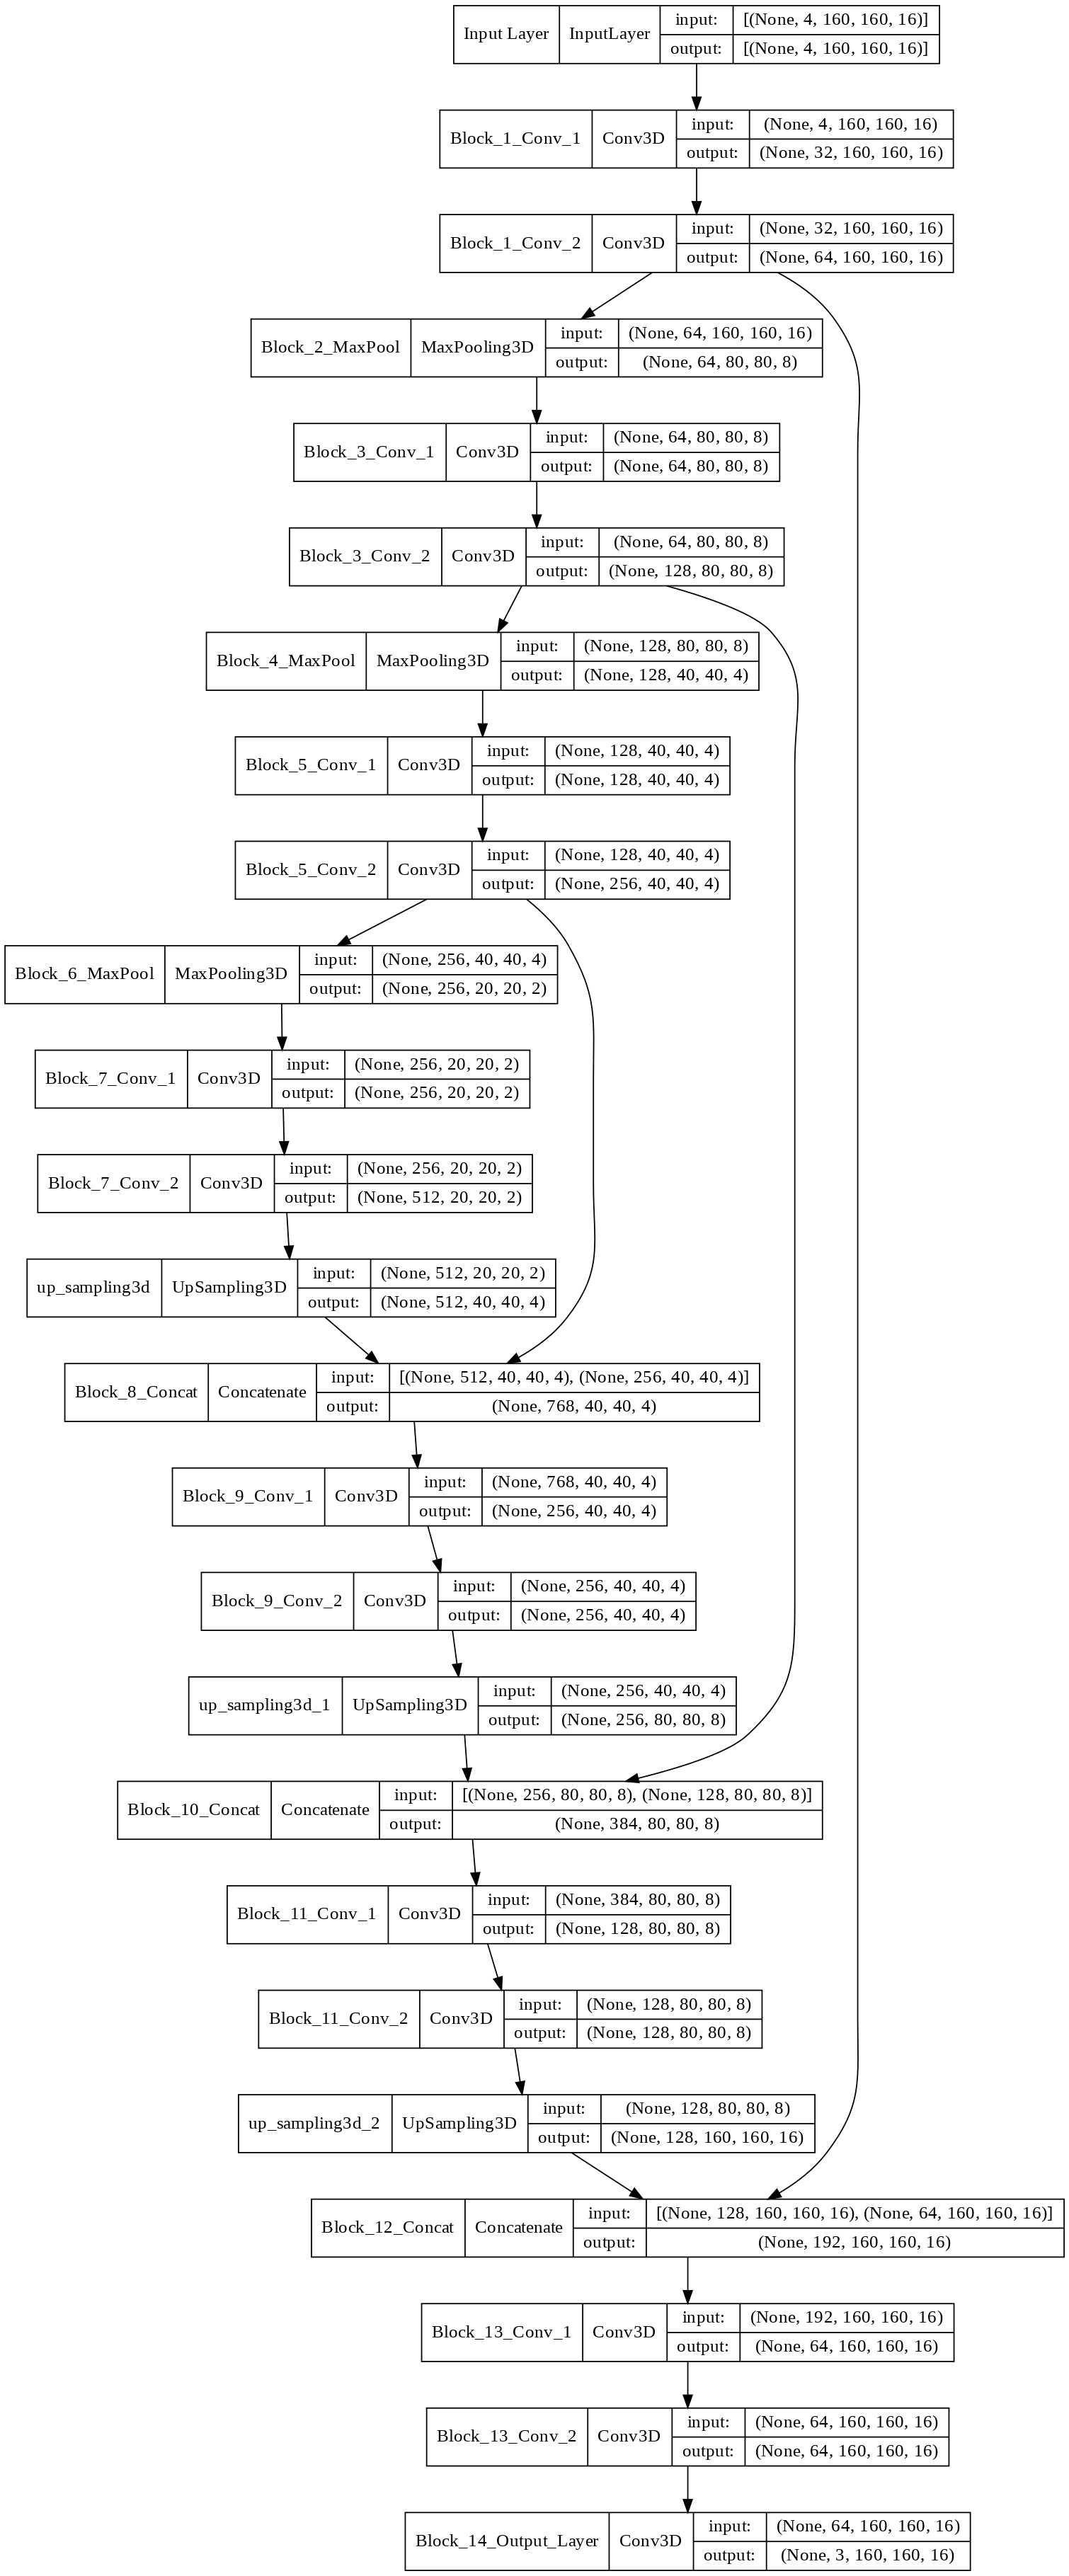

In [ ]:
os.chdir('/content/')
x_in = layers.Input(shape=(4,160,160,16),name="Input Layer")

# Block 1

B1 = layers.Conv3D(32,kernel_size=(3,3,3),padding="same",activation="relu",name="Block_1_Conv_1",data_format="channels_first") (x_in)

B1 = layers.Conv3D(64,kernel_size=(3,3,3),padding="same",activation="relu",name="Block_1_Conv_2",data_format="channels_first") (B1)


# Block 2
B2 = layers.MaxPool3D(pool_size =(2,2,2), strides = 2,name="Block_2_MaxPool",data_format="channels_first") (B1)

# Block 3
B3 = layers.Conv3D(64,kernel_size=(3,3,3),padding="same",activation="relu",name="Block_3_Conv_1",data_format="channels_first") (B2)


B3 = layers.Conv3D(128,kernel_size=(3,3,3),padding="same",activation="relu",name="Block_3_Conv_2",data_format="channels_first") (B3)


# Block 4
B4 = layers.MaxPool3D(pool_size=(2,2,2),strides = 2,name="Block_4_MaxPool",data_format="channels_first") (B3)

# Block 5
B5 = layers.Conv3D(128,kernel_size=(3,3,3),padding="same",activation="relu",name="Block_5_Conv_1",data_format="channels_first") (B4)


B5 = layers.Conv3D(256,kernel_size=(3,3,3),padding="same",activation="relu",name="Block_5_Conv_2",data_format="channels_first") (B5)


# Block 6
B6 = layers.MaxPool3D(pool_size=(2,2,2),strides = 2,name="Block_6_MaxPool",data_format="channels_first") (B5)

# Block 7
B7 = layers.Conv3D(256,kernel_size=(3,3,3),padding="same",activation="relu",name="Block_7_Conv_1",data_format="channels_first") (B6)


B7 = layers.Conv3D(512,kernel_size=(3,3,3),padding="same",activation="relu",name="Block_7_Conv_2",data_format="channels_first") (B7)

# Block 8

B8 = layers.UpSampling3D(size=(2,2,2),data_format="channels_first" ) (B7)

B8 = layers.concatenate([B8,B5],name="Block_8_Concat",axis=1)
# Block 9
B9 = layers.Conv3D(256,kernel_size=(3,3,3),padding = "same",activation="relu",name="Block_9_Conv_1",data_format="channels_first")(B8)

B9 = layers.Conv3D(256,kernel_size=(3,3,3),padding = "same",activation="relu",name="Block_9_Conv_2",data_format="channels_first")(B9)


# Block 10
B10 = layers.UpSampling3D(size=(2,2,2),data_format="channels_first") (B9)

B10 = layers.concatenate([B10,B3],name="Block_10_Concat",axis=1)

# Block 11
B11 = layers.Conv3D(128,kernel_size=(3,3,3),padding = "same",activation="relu",name="Block_11_Conv_1",data_format="channels_first")(B10)

B11 = layers.Conv3D(128,kernel_size=(3,3,3),padding = "same",activation="relu",name="Block_11_Conv_2",data_format="channels_first")(B11)


# Block 12
B12 = layers.UpSampling3D(size=(2,2,2),data_format="channels_first") (B11)

B12 = layers.concatenate([B12,B1],name="Block_12_Concat",axis=1)

# Block 13
B13 = layers.Conv3D(64,kernel_size=(3,3,3),padding = "same",activation="relu",name="Block_13_Conv_1",data_format="channels_first")(B12)

B13 = layers.Conv3D(64,kernel_size=(3,3,3),padding = "same",activation="relu",name="Block_13_Conv_2",data_format="channels_first")(B13)


# Block 14
B14 = layers.Conv3D(3,kernel_size=(1,1,1),padding = "same",activation="sigmoid",name="Block_14_Output_Layer",data_format="channels_first")(B13)

model_wb = keras.Model(x_in, B14)
from keras.utils.vis_utils import plot_model

plot_model(model_wb,show_shapes = True, dpi = 128, to_file = '3D_UNET.png')

<a name="4.2"></a>
## 4.2 Dice Loss and Coefficient for 3D U-Net 

Just as [section 3.3](#3.3) here also we have used Dice Coefficent and Dice Loss for 3D Unet for segmentation. 

Note that the code is also taken from [Colab Tutorial.](https://colab.research.google.com/github/hardik0/AI-for-Medicine-Specialization/blob/master/AI-for-Medical-Diagnosis/Week-3/Brain_Tumor_Auto_Segmentation_for_Magnetic_Resonance_Imaging_(MRI)_Assignment.ipynb)

In [ ]:
def dice_coefficient(y_true, y_pred, axis=(1, 2, 3), 
                     epsilon=0.00001):
    dice_numerator = 2. * K.sum(y_true * y_pred, axis=axis) + epsilon
    dice_denominator = K.sum(y_true, axis=axis) + K.sum(y_pred, axis=axis) + epsilon
    dice_coefficient = K.mean((dice_numerator)/(dice_denominator))
 
    return dice_coefficient

In [ ]:
def soft_dice_loss(y_true, y_pred, axis=(1, 2, 3), 
                   epsilon=0.00001):

    dice_numerator = 2. * K.sum(y_true * y_pred, axis=axis) + epsilon
    dice_denominator = K.sum(y_true**2, axis=axis) + K.sum(y_pred**2, axis=axis) + epsilon
    dice_loss = 1 - K.mean((dice_numerator)/(dice_denominator))

    return dice_loss

<a name="4.3"></a>
## 4.3 Compile and Train the Model

As stated in [section 2.3.3](#2.3.3), we can not use the whole data set to train the model therefore we use the TensorFlow data generation pipeline for this purpose. 

Again here also the code is taken from [Colab Tutorial.](https://colab.research.google.com/github/hardik0/AI-for-Medicine-Specialization/blob/master/AI-for-Medical-Diagnosis/Week-3/Brain_Tumor_Auto_Segmentation_for_Magnetic_Resonance_Imaging_(MRI)_Assignment.ipynb) and the ___data_generation function is modified for our application purpose.

### Tensorflow datagenerator

In [ ]:
class VolumeDataGenerator(tf.keras.utils.Sequence):
    def __init__(self,
                 sample_list,
                 base_dir,
                 batch_size=1,
                 shuffle=True,
                 dim=(160, 160, 16),
                 num_channels=4,
                 num_classes=3,
                 verbose=1):
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.base_dir = base_dir
        self.dim = dim
        self.num_channels = num_channels
        self.num_classes = num_classes
        self.verbose = verbose
        self.sample_list = sample_list
        self.on_epoch_end()
    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.sample_list))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)
    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.sample_list) / self.batch_size))
    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples'
        # Initialization
        X = np.zeros((self.batch_size,self.num_channels, *self.dim ),
                     dtype=np.float64)
        y = np.zeros((self.batch_size,self.num_classes, *self.dim ),
                     dtype=np.float64)
        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            # Store sample
            if self.verbose == 1:
                print("Training on: %s" % self.base_dir + ID)
            with h5py.File(self.base_dir+ ID, 'r') as f:
                X[i] = np.transpose(np.array(f.get("X")),axes = (0,-1,1,2,3))
                y[i] = np.transpose(np.array(f.get("y")),axes = (0,-1,1,2,3))[:,1:,:,:,:]
        return X, y
    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[
                  index * self.batch_size: (index + 1) * self.batch_size]
        # Find list of IDs
        sample_list_temp = [self.sample_list[k] for k in indexes]
        # Generate data
        X, y = self.__data_generation(sample_list_temp)
        return X, y

### Train and Validation Data generator
Using the above data generator we have created train and validation data generator for training and testing the model.

In [ ]:
listt = os.listdir('/content/drive/Shareddrives/CS725_Project/Harsh /TF_Dataset/Train')
list_valid = os.listdir('/content/drive/Shareddrives/CS725_Project/Harsh /TF_Dataset/Valid')
train_generator = VolumeDataGenerator(listt, "/content/drive/Shareddrives/CS725_Project/Harsh /TF_Dataset/Train/", batch_size=1, dim=(160, 160, 16), verbose=0)
valid_generator = VolumeDataGenerator(list_valid, "/content/drive/Shareddrives/CS725_Project/Harsh /TF_Dataset/Valid/", batch_size=1, dim=(160, 160, 16), verbose=0)
train_generator, valid_generator

(<__main__.VolumeDataGenerator at 0x7f23582f9790>,
 <__main__.VolumeDataGenerator at 0x7f2348d074d0>)

### Train and Save the Model

As stated in [section 4.1](#4.1) that the advantage of taking a pretrained model from an internet source is that we can use the weights from that model to intialize our model and then fine tune for our application. 

Same is implemeted below and the trained model is saved in shared drive.

In [ ]:
opt = tf.keras.optimizers.Adam(1e-6)
model_wb.compile(optimizer=opt, loss=soft_dice_loss, metrics=[dice_coefficient])
model_wb.load_weights('/content/drive/Shareddrives/CS725_Project/Harsh /TF_Dataset/Saved_Model/' + 'u_net_3d_trained.hdf5')
history = model_wb.fit(train_generator,epochs=50,validation_data=valid_generator,verbose=1)
model_wb.save_weights('/content/drive/Shareddrives/CS725_Project/Harsh /TF_Dataset/Saved_Model/' + 'u_net_3d_trained.hdf5')

Epoch 1/50
140/140 [==============================] - 88s 616ms/step - loss: 0.5349 - dice_coefficient: 0.4352 - val_loss: 0.5581 - val_dice_coefficient: 0.4144
Epoch 2/50
140/140 [==============================] - 86s 614ms/step - loss: 0.5314 - dice_coefficient: 0.4404 - val_loss: 0.5613 - val_dice_coefficient: 0.4147
Epoch 3/50
140/140 [==============================] - 86s 614ms/step - loss: 0.5205 - dice_coefficient: 0.4529 - val_loss: 0.5519 - val_dice_coefficient: 0.4242
Epoch 4/50
140/140 [==============================] - 86s 614ms/step - loss: 0.5267 - dice_coefficient: 0.4482 - val_loss: 0.5423 - val_dice_coefficient: 0.4341
Epoch 5/50
140/140 [==============================] - 86s 614ms/step - loss: 0.5172 - dice_coefficient: 0.4578 - val_loss: 0.5540 - val_dice_coefficient: 0.4244
Epoch 6/50
140/140 [==============================] - 86s 614ms/step - loss: 0.5198 - dice_coefficient: 0.4565 - val_loss: 0.5374 - val_dice_coefficient: 0.4394
Epoch 7/50
140/140 [==============

<a name="5"></a>
# 5 Results

Results for 2D U-Net and 3D U-Net models are shown in this section.

<a name="5.1"></a>
## 5.1 Results of 2D U-Net Model


### Load the saved model from file

In [ ]:
model2D=tf.keras.models.load_model('/content/drive/Shareddrives/CS725_Project/model_naina/model2D_final.h5',custom_objects={'dice_coef_loss':dice_coef_loss,'dice_coef':dice_coef})

###Load Test Data

In [ ]:
X_test=np.load('/content/drive/Shareddrives/CS725_Project/numpy_dataset/X_test5.npy')
Y_test=np.load('/content/drive/Shareddrives/CS725_Project/numpy_dataset/Y_test5.npy')

### Evaluation of model on the test set

In [ ]:
Y_test=keras.utils.to_categorical(Y_test,num_classes=4,dtype=np.uint8)
X_test = np.float32(X_test)
Y_test = np.float32(Y_test)
model2D.evaluate(X_test,Y_test)


21/21 [==============================] - 5s 197ms/step - loss: 0.0398 - dice_coef: 0.9602


[0.03981157764792442, 0.9601885676383972]

### Visualizing the Predictions

Steps involved for vizualization are explained in [section 2.2](#2.2). 

Some modifications have been done for vizualization of 2D data in transversal plane.


In [ ]:
def viz(image, label, cat = False):
  image = cv2.normalize(image[:,:,:,2], None, alpha=0, beta=255,
                            norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F).astype(
          np.uint8)
  # plt.imshow(image[0,:,:])
  if not cat:
    label = tf.keras.utils.to_categorical(label[:,:,:],num_classes=4).astype(
          np.uint8)
  labeled_image = np.zeros_like(label[:, :, :, 1:])
  labeled_image[:, :, :, 0] = image * (label[:, :, :, 0])
  labeled_image[:, :, :, 1] = image * (label[:, :, :, 0])
  labeled_image[:, :, :, 2] = image * (label[:, :, :, 0])
  
  labeled_image += label[:, :, :, 1:] * 255
  return labeled_image



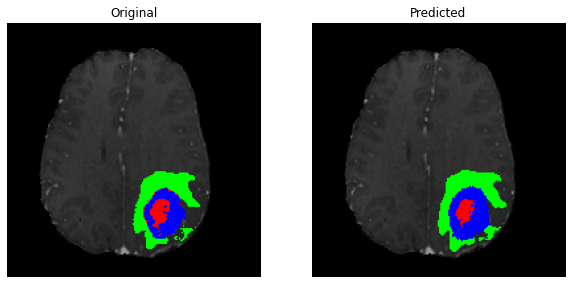

In [ ]:
i=69 
labeled_image = viz(X_test, Y_test)
plt.subplot(1,2,1)
plt.imshow(labeled_image[i,:,:,:])
plt.title('Original')
plt.axis('off')
labeled_pred = viz(X_test, pred)
plt.subplot(1,2,2)
plt.imshow(labeled_pred[i,:,:,:])
plt.title('Predicted')
plt.axis('off')
fig = plt.gcf()
fig.set_size_inches(10, 8)
fig.savefig('2D_'+str(i)+'.png', dpi=100)


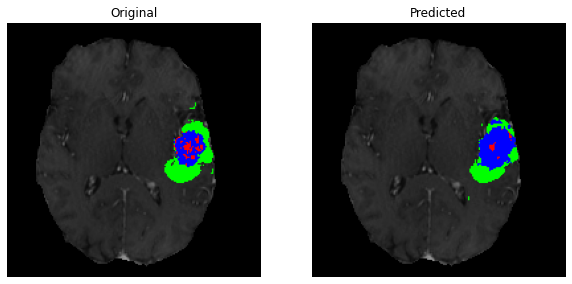

In [ ]:
i = 52  # Sample number 52
plt.subplot(1,2,1)
plt.imshow(labeled_image[i,:,:,:])
plt.title('Original')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(labeled_pred[i,:,:,:])
plt.title('Predicted')
plt.axis('off')
fig = plt.gcf()
fig.set_size_inches(10, 8)
fig.savefig('2d-3.png', dpi=100)

<a name="5.2"></a>
## 5.2 Results of 3D U-Net Model


### Load the saved model from file

In [ ]:
dirr = "/content/drive/Shareddrives/CS725_Project/Harsh /TF_Dataset/Saved_Model/"
opt = tf.keras.optimizers.Adam(1e-6)
model_wb.compile(optimizer=opt, loss=soft_dice_loss, metrics=[dice_coefficient])
model_wb.load_weights(dirr+ "u_net_3d_wb_trained.hdf5")


###Load Test Data

In [ ]:
list_test = os.listdir('/content/drive/Shareddrives/CS725_Project/Harsh /TF_Dataset/Test')
test_generator = VolumeDataGenerator(list_test, "/content/drive/Shareddrives/CS725_Project/Harsh /TF_Dataset/Test/", batch_size=1, dim=(160, 160, 16), verbose=0)

### Evaluation of model on the test set

In [ ]:

test_loss_wb, test_dice_wb = model_wb.evaluate(test_generator)

print("test soft dice loss: {:.4f} and Dice Coeffients: {:.4f}".format(test_loss_wb, test_dice_wb))


30/30 [==============================] - 24s 807ms/step - loss: 0.5901 - dice_coefficient: 0.3960
test soft dice loss: 0.5901 and Dice Coeffients: 0.3960


### Visualizing the Predictions
Code for visualization the prediction is taken from [Colab Tutorial](https://colab.research.google.com/github/hardik0/AI-for-Medicine-Specialization/blob/master/AI-for-Medical-Diagnosis/Week-3/Brain_Tumor_Auto_Segmentation_for_Magnetic_Resonance_Imaging_(MRI)_Assignment.ipynb) and modified for our purpose.

In [ ]:
def get_labeled_image(image, label, is_categorical=False):
    if not is_categorical:
        label = to_categorical(label, num_classes=4).astype(np.uint8)

    image = cv2.normalize(image[:, :, :, 2], None, alpha=0, beta=255,
                          norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F).astype(
        np.uint8)

    labeled_image = np.zeros_like(label[:, :, :, 1:])

    # remove tumor part from image
    labeled_image[:, :, :, 0] = image * (label[:, :, :, 0])
    labeled_image[:, :, :, 1] = image * (label[:, :, :, 0])
    labeled_image[:, :, :, 2] = image * (label[:, :, :, 0])

    # color labels
    labeled_image += label[:, :, :, 1:] * 255
    return labeled_image

In [ ]:
def predict_and_viz(image, label, model, threshold, loc=(100, 100, 50)):
    image_labeled = get_labeled_image(image.copy(), label.copy())

    model_label = np.zeros([3, 320, 320, 160])

    for x in range(0, image.shape[0], 160):
        for y in range(0, image.shape[1], 160):
            for z in range(0, image.shape[2], 16):
                patch = np.zeros([4, 160, 160, 16])
                p = image[x: x + 160, y: y + 160, z:z + 16, :]
                patch[:, 0:p.shape[0], 0:p.shape[1], 0:p.shape[2]] = np.moveaxis(p,3,0)
                pred = model.predict(np.expand_dims(patch, 0))
                model_label[:, x:x + p.shape[0],
                y:y + p.shape[1],
                z: z + p.shape[2]] += pred[0][:,:p.shape[0], :p.shape[1],
                                      :p.shape[2]]

    model_label = model_label[:, 0:240, 0:240, 0:155]
    model_label_reformatted = to_categorical(label, num_classes=4).astype(
        np.uint8)
    
    model_label_reformatted[:, :, :, 1:] = np.moveaxis(model_label[:,:,:,:],0,3)

    model_labeled_image = get_labeled_image(image, model_label_reformatted,
                                            is_categorical=True)

    fig, ax = plt.subplots(2, 3, figsize=[10, 7])

    # plane values
    x, y, z = loc

    ax[0][0].imshow(np.rot90(image_labeled[x, :, :, :]))
    ax[0][0].set_ylabel('Ground Truth', fontsize=15)
    ax[0][0].set_xlabel('Sagital', fontsize=15)

    ax[0][1].imshow(np.rot90(image_labeled[:, y, :, :]))
    ax[0][1].set_xlabel('Coronal', fontsize=15)

    ax[0][2].imshow(np.squeeze(image_labeled[:, :, z, :]))
    ax[0][2].set_xlabel('Transversal', fontsize=15)

    ax[1][0].imshow(np.rot90(model_labeled_image[x, :, :, :]))
    ax[1][0].set_ylabel('Prediction', fontsize=15)

    ax[1][1].imshow(np.rot90(model_labeled_image[:, y, :, :]))
    ax[1][2].imshow(model_labeled_image[:, :, z, :])

    fig.subplots_adjust(wspace=0, hspace=.12)

    for i in range(2):
        for j in range(3):
            ax[i][j].set_xticks([])
            ax[i][j].set_yticks([])
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    fig.savefig('3d_4_LGG.png', dpi=100)
    return model_label_reformatted

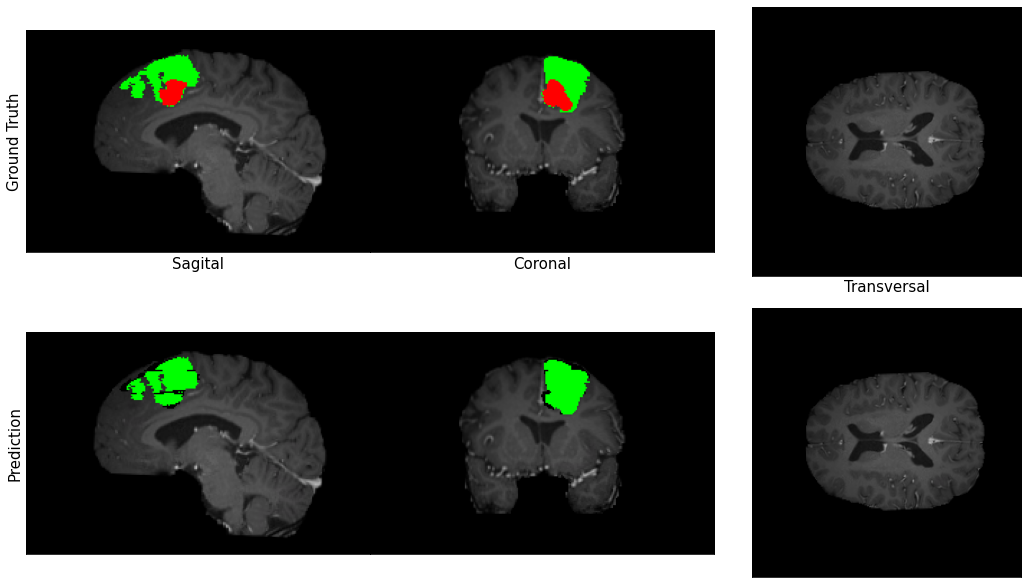

In [ ]:
path_file = '/content/drive/Shareddrives/CS725_Project/data/BRATS2013/LGG/Brats18_2013_15_1/'
file_name = 'Brats18_2013_15_1_'
path_label = path_file+file_name+'seg.nii.gz'
path_image_1 = path_file+file_name+'flair.nii.gz'
path_image_2 = path_file+file_name+'t1.nii.gz'
path_image_3 = path_file+file_name+'t1ce.nii.gz'
path_image_4 = path_file+file_name+'t2.nii.gz'

image_1 = np.array(nib.load(path_image_1).get_fdata())
image_2 = np.array(nib.load(path_image_2).get_fdata())
image_3 = np.array(nib.load(path_image_3).get_fdata())
image_4 = np.array(nib.load(path_image_4).get_fdata())
image_all = np.zeros((*image_1.shape,4))
image_all[:,:,:,0] = image_1
image_all[:,:,:,1] = image_2
image_all[:,:,:,2] = image_3
image_all[:,:,:,3] = image_4
image = image_all
label = np.array(nib.load(path_label).get_fdata())
label = np.where(label==4,3,label)
pred = predict_and_viz(image, label, model_wb,0, loc=(125, 100, 85))    

In [ ]:
%%javascript
<!-- Save the notebook -->
IPython.notebook.save_checkpoint();

In [ ]:
%%javascript
IPython.notebook.session.delete();
window.onbeforeunload = null
setTimeout(function() { window.close(); }, 1000);